# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests # Импортируем библиотеку requests
import category_encoders as ce
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

from math import log

# 1. Чтение данных

In [213]:
hotels = pd.read_csv('./data/hotels.csv')


# 2. Исследование данных

In [11]:
display(hotels.head(2))
display(hotels.info())

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

In [12]:
display(hotels.head(2))
display(hotels.info())

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

In [13]:
display(hotels.head(2))
display(hotels.info())

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

In [14]:
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,384355.000000,384355.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.443522,2.823402
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,3.466936,4.579043
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.214662,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233


# Удаляем дубликаты

In [214]:
dupl_columns = list(hotels.columns)

print(f'Число найденных дубликатов: {hotels.shape[0]}')

mask = hotels.duplicated( subset = dupl_columns )
hh_duplicates = hotels[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')
#307

hotels.drop_duplicates(subset = dupl_columns, inplace = True)
print(f'Результирующее число записей: {hotels.shape[0]}')
#386496


Число найденных дубликатов: 386803
Число найденных дубликатов: 307
Результирующее число записей: 386496


# Анализируем пропуски

In [215]:
# Печатает поля с null признаками
def get_nulls_fiels(df):
    cols_null_percent = df.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values( ascending = False )
    display(cols_with_null)
    
get_nulls_fiels( hotels )

lat    0.633383
lng    0.633383
dtype: float64

### Заполним медианным значением того города, в котором признак заполнен. Так не придется использовать geocoder

In [216]:
# Выкусываем 2 последних слова.Это страна и город (с небольшим исключением, но для пропущенных данных справедливо)
hotels["town"] = hotels["hotel_address"].apply( lambda x: ' '.join( x.split()[-2:] ) )

# Колонки с null
col_null = ["lng", "lat"]

dict_col_not_null = dict()
for col in col_null:
    # Из строк с coll == null получим список стран и городов
    arr = hotels[hotels[col].isnull()].loc[:,"town"].unique()
    # Получим медианы найденных городов и стран с заполненными колонками
    dict_median = hotels[hotels['town'].isin(arr) & hotels[col].notnull()].groupby( ["town"] )[col].median().to_dict()
    print( f"Заполняю признак {col} == null медианой: {dict_median}" )
    hotels[col] = hotels.apply( lambda x: dict_median.get( x["town"] ) if pd.isnull( x[col] ) else x[col], axis=1 )

# Поле более не нужно
hotels.drop( "town", axis=1, inplace=True )

Заполняю признак lng == null медианой: {'Barcelona Spain': 2.1696699, 'Paris France': 2.328075, 'Vienna Austria': 16.3686397}
Заполняю признак lat == null медианой: {'Barcelona Spain': 41.388024, 'Paris France': 48.8671391, 'Vienna Austria': 48.2044655}


In [217]:
get_nulls_fiels( hotels )
# Пропусков нет

Series([], dtype: float64)

# Создаем/модифицируем признаки

### days_since_review

In [218]:
# Выкусываем число дней
hotels["days_since_review"] = hotels["days_since_review"].apply( lambda x: re.sub('[^0-9]', '', x )).astype(int)

### review_date

In [219]:
# Из строки дам создаем признаки дня, месяца и года
hotels['review_date'] =  pd.to_datetime(hotels['review_date'], dayfirst=False,yearfirst=False)
hotels["review_date_year"] = hotels["review_date"].dt.year
hotels["review_date_month"] = hotels["review_date"].dt.month
hotels["review_date_day"] = hotels["review_date"].dt.day
hotels['review_date'] =  hotels["review_date"].dt.year * 365 + hotels["review_date"].dt.month * 12 + hotels["review_date"].dt.day


<Axes: >

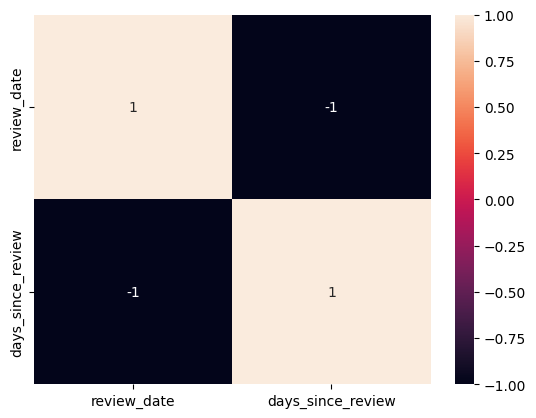

In [144]:
# Сразу проверим на корреляцию пару полей review_date (и производные) и days_since_review. По смыслу схожи
sns.heatmap(hotels[['review_date',"days_since_review"]].corr(numeric_only=True).round(1), annot=True)

In [220]:
# Удалим колонки. 3 признака из них мы уже создали
hotels.drop( ['review_date','days_since_review'], axis=1, inplace=True )

In [221]:
# Оценим процент уникальных полей
def get_percent_unique( df ):
    print( hotels.nunique() * 100 / hotels.shape[0] )
    
get_percent_unique( hotels )

hotel_address                                  0.386291
additional_number_of_scoring                   0.124193
average_score                                  0.008797
hotel_name                                     0.386032
reviewer_nationality                           0.058215
negative_review                               64.380485
review_total_negative_word_counts              0.104011
total_number_of_reviews                        0.295475
positive_review                               80.657238
review_total_positive_word_counts              0.091592
total_number_of_reviews_reviewer_has_given     0.050195
reviewer_score                                 0.009573
tags                                          12.195469
lat                                            0.380858
lng                                            0.380858
review_date_year                               0.000776
review_date_month                              0.003105
review_date_day                                0

### hotel_name - Категориальный номинальный признак => Binary coding

In [222]:
cols = ['hotel_name']

bin_encoder = ce.BinaryEncoder(cols=cols) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels[cols])
hotels = pd.concat([hotels, type_bin], axis=1)

### Разбор признаков positive_review, negative_review. Используем меру tf-idf для оценки важности слова в контексте документа


In [223]:
# Чистим от спец знаков
hotels["positive_review"] = hotels["positive_review"].apply( lambda x: re.sub( r'[^a-zA-Z0-9а-яА-Я]', ' ', x ).strip().lower() + ' ' )
hotels["negative_review"] = hotels["negative_review"].apply( lambda x: re.sub( r'[^a-zA-Z0-9а-яА-Я]', ' ', x ).strip().lower() + ' ' )

# Группируем данные по отелям
df_grp_pos = hotels.groupby( "hotel_name" )["positive_review"].sum().reset_index()
df_grp_neg = hotels.groupby( "hotel_name" )["negative_review"].sum().reset_index()

### Функции для экономной версии tf-idf

In [224]:
#############################################################################################################
#
# Вход: Строка текста
# Выход: Список слов 3х и более знаков и не среди списка слов-исключений. Буквы на спец символы не проверяются
# Пример: 'There are apples where while and black.' ==> ['there', 'are', 'apples', 'while', 'black.']
#
#############################################################################################################
def parse_msg( msg ):
    # На всякий случай - исключим эти слова из рейтингов
    words_excl = [
        "the",
        "and",
        "was",
        "are",
        "where",
        "for"
    ]      
        
    # Возвращает True, если слово длинее 2х знаков и не в списке исключений
    def flt_words( x ):
        return len( x ) > 2 and x not in words_excl    
    
    words = filter( lambda x: flt_words( x ), msg.lower().split() )
    return list( filter( lambda x: x.strip() , words ) )


#############################################################################################################
# Возвращает число - суммарный каждого слова сообщения рейтинг по метрике tf-idf 
#
# Вход: Строка текста
#    msg - Строка текста
#    grp - Код группы, к которой относится сообщение
#    arr_df_idf - Список групп (пкз): в каждой из которых в вычисленный рейтинг слова по метрике tf-idf
#    dict_words_by_name - словарь слов, ключ - слово { "Слово 1": 0, "Слово 2": 1 }
#    dict_grp_by_name - словарь групп ключ - название группы { "Группа 1": 0, "Группа 2": 1 }
#
# Выход - Число, суммарный рейтинг сообщения 
# Пример: 
#
#############################################################################################################
def calc_rating_msg( msg, grp, arr_df_idf, dict_words_by_name, dict_grp_by_name ):
    words = parse_msg( msg )
    rating = 0
    for word in words:
        rating += arr_df_idf[dict_words_by_name[word][0]][dict_grp_by_name[grp][0]]         
    return rating


#############################################################################################################
# Создает справочники групп и слов 
#
# Вход: Строка текста
#    df - Датафрейм с сообщением
#    col_grp - Поле группы
#    col_text - Поле текста
#
# Выход - tuple с 4мя справочниками преобразований кода в слово или категорию и обратно (dict_words_by_name, dict_grp_by_name, dict_words_by_id, dict_grp_by_id)
#    
#    dict_words_by_name - Словарь отображения слова в tuple(идентификатор слова, количество повторений в полном датафрейме)
#    dict_grp_by_name - Словарь отображения названия группы в tuple(идентификатор групп, количество слов в группе)
#    dict_words_by_id - Словарь отображения идентификатора слова в слово: tuple(слово, количество повторений слов в датафрейме)
#    dict_grp_by_id - Словарь отображения идентификатора группы в название: tuple (название, количество слов в группе)
#    
#    
#############################################################################################################
def id_idf_make_dict( df, col_grp, col_text ):
    # Словарь слов
    dict_grp_by_name = {}
    dict_words_by_name = {}
    dict_grp_by_id = {}
    dict_words_by_id = {}
    ind_word = 0

    for index, row in df.iterrows():
        grp = row[col_grp] # Название группы

        # Получим список слов
        tmp_lst = parse_msg( row[col_text] )
        
        # Извлекаем слово из строки
        for word in tmp_lst:
            # Обновим частота слов по всем группам
            if word not in dict_words_by_name:
                dict_words_by_name[word] = (ind_word,1)
                dict_words_by_id[dict_words_by_name[word][0]] = (word,1)
            else:
                dict_words_by_name[word] = (dict_words_by_name[word][0], dict_words_by_name[word][1] + 1)  
                dict_words_by_id[dict_words_by_name[word][0]] = (dict_words_by_id[dict_words_by_name[word][0]][0], dict_words_by_id[dict_words_by_name[word][0]][1] + 1)
            
            ind_word = ind_word + 1
         
        # Количество слов в группе
        dict_grp_by_name[grp] = ( index, len( tmp_lst ) )
        dict_grp_by_id[index] = ( grp, len( tmp_lst ) )
        
    return (dict_words_by_name, dict_grp_by_name, dict_words_by_id, dict_grp_by_id)

#############################################################################################################
# Создает словарь идентавикаторов групп, содержащих словарь идентификаторов слов и количества повторений в группе
#
# Вход: Строка текста
#    df - Датафрейм с сообщением
#    col_grp - Поле группы
#    col_text - Поле текста
#    dict_цщкв_by_name - Словарь отображения слова в идентификаторы (кодирование) 
#    dict_grp_by_name - Словарь отображения групп в идентификаторы (кодирование) 
#    dict_word_by_id - Словарь отображения идентификаторов слов в слова (декодирование) 
#    dict_grp_by_id - Словарь отображения идентификатора группы в название (декодирование) 
#
# Выход: - словарь рейтингов с метрикой tf-idf
#    words_rating = { ИД слова: {ИД группы: рейтинг}}
#    
#############################################################################################################
def id_idf( df, col_grp, col_text, dict_words_by_name, dict_grp_by_name, dict_word_by_id, dict_grp_by_id ):
    print('---->> Старт')
    # Словарь слов
    dict_grp_words = {}
    dict_words_grp = {}
    words_rating = {}
    arr_grp = []
    cnt_groups = df.shape[0] # Экономим вычисления
    
    for index, row in df.iterrows():
        grp = row[col_grp] # Название группы
        grp_id = dict_grp_by_name[ grp ][0] # ID группы
        arr_grp.append( grp_id ) # По этим ключам будем считать tf-idf
        
        # Список слов в группе
        tmp_lst = list( map( lambda x: dict_words_by_name[x][0], parse_msg( row[col_text] )  ) )
        # Список уникальных слов в группе
        set_lst = list( set( tmp_lst ) )
        
        # Частота слов в группе (Nword,grp)
        tmp_word_in_groups = {}
        for word_id in set_lst:
            tmp_word_in_groups[word_id] = tmp_lst.count( word_id )

        dict_grp_words[grp_id] = tmp_word_in_groups
    
    # Подсчет количества групп, в которые входит слово { "Слово 1": 7, "Слово 2": 11, ...}
    for word_id in dict_word_by_id:
        for grp_id in dict_grp_words:
            # Обновим частоты слов по всем группам
            if word_id in dict_grp_words[grp_id]:
                if word_id not in dict_words_grp:
                    dict_words_grp[word_id] = 1
                else:
                    dict_words_grp[word_id] += 1  

    # Словарь расчетов df-idf
    for grp_id in arr_grp:
        for word_id in dict_grp_words[grp_id]:
            tf = dict_grp_words[grp_id][word_id] / dict_grp_by_id[grp_id][1]
            idf = cnt_groups / dict_words_grp[word_id]
            tf_idf = tf * log( idf )
            if word_id not in words_rating:
                words_rating[word_id] = {}
            words_rating[word_id][grp_id] = tf_idf
            #print( f"word_id = {word_id}, grp_id = {grp_id}, tf = {tf}, idf = {idf}, Nw = {dict_grp_words[grp_id][word_id]}, N = {dict_grp_by_id[grp_id][1]}, Ngw = {dict_words_grp[word_id]}, Ng = {dict_words_grp[word_id]}, tf_idf = {tf_idf} " )
            
    print('---->> Финиш')
    return words_rating

In [25]:
############################### Тестовый образец данных для проверки интегральной версии оценки tf-idf
#
d = {'col_msg': ["111 222 333 444 111","222 555 777"], 'col_grp': ["row1", "row2"]}
df_test = pd.DataFrame(data=d)

test_grp_by_name = {'row1': (1,5), 'row2':(2,3)}
test_grp_by_id = {1:('row1',5), 2:('row2',3)}
test_words_by_name = {'111':(0,1), '222':(1,2), '333':(2,1), '444':(3,1), '555':(4,1), '777':(6,1)}
test_words_by_id = {0:('111',1), 1:('222',2), 2:('333',1), 3:('444',1),4:('555',1),6:('777',1)}

rating_words = id_idf( df_test, "col_grp", "col_msg", test_words_by_name,test_grp_by_name,test_words_by_id,test_grp_by_id )
print( f"rating_words: {rating_words}" )


---->> Старт
---->> Финиш
rating_words: {0: {1: 0.2772588722239781}, 1: {1: 0.0, 2: 0.0}, 2: {1: 0.13862943611198905}, 3: {1: 0.13862943611198905}, 4: {2: 0.23104906018664842}, 6: {2: 0.23104906018664842}}


### Готовим словари

In [225]:
dict_words_by_name_pos, dict_grp_by_name_pos, dict_words_by_id_pos, dict_grp_by_id_pos = id_idf_make_dict( df_grp_pos, "hotel_name", "positive_review" )  
dict_words_by_name_neg, dict_grp_by_name_neg, dict_words_by_id_neg, dict_grp_by_id_neg = id_idf_make_dict( df_grp_neg, "hotel_name", "negative_review" )  

In [226]:
print( 'Вычисляем значимость слов из признака positive_review' )
rating_words_pos = id_idf( df_grp_pos, "hotel_name", "positive_review", dict_words_by_name_pos, dict_grp_by_name_pos, dict_words_by_id_pos, dict_grp_by_id_pos )

print()
print( 'Вычисляем значимость слов из признака negative_review' )
rating_words_neg = id_idf( df_grp_neg, "hotel_name", "negative_review", dict_words_by_name_neg, dict_grp_by_name_neg, dict_words_by_id_neg, dict_grp_by_id_neg )

print()
print( 'Добавляем рейтинги отзывов positive_review, negative_review' )
hotels["positive_review_rating"] = hotels.apply( lambda x: calc_rating_msg( x["positive_review"], x["hotel_name"], rating_words_pos, dict_words_by_name_pos, dict_grp_by_name_pos ), axis=1 )
hotels["negative_review_rating"] = hotels.apply( lambda x: calc_rating_msg( x["negative_review"], x["hotel_name"], rating_words_neg, dict_words_by_name_neg, dict_grp_by_name_neg ), axis=1 )



Вычисляем значимость слов из признака positive_review
---->> Старт
---->> Финиш

Вычисляем значимость слов из признака negative_review
---->> Старт
---->> Финиш

Добавляем рейтинги отзывов positive_review, negative_review


### Добавим  top 10 слов из позитивной и негативной оценок

In [227]:
# top 10 слов
top_cnt = 10
words_add_pos = list( dict( sorted( dict_words_by_name_pos.items(), key = lambda x: x[1][1], reverse=True )[:top_cnt] ).keys() )
words_add_neg = list( dict( sorted( dict_words_by_name_neg.items(), key = lambda x: x[1][1], reverse=True )[:top_cnt] ).keys() )

list_add_words = [words_add_pos,words_add_neg]

for word in words_add_pos:
    hotels[word + '_pos'] = hotels["positive_review"].apply( lambda x: 1 if word in x else 0 )
    
for word in words_add_neg:
    hotels[word + '_neg'] = hotels["negative_review"].apply( lambda x: 1 if word in x else 0 )

print( "Добавлены поля" )
print( words_add_pos )
print( words_add_neg )

Добавлены поля
['staff', 'very', 'location', 'room', 'hotel', 'good', 'great', 'were', 'friendly', 'breakfast']
['room', 'negative', 'not', 'very', 'but', 'hotel', 'were', 'had', 'that', 'breakfast']


In [228]:
# Проверим частоту (что заполнилось)
hotels[hotels["positive_review"].str.contains( words_add_pos[0])].shape[0]

141977

### Разбор признаков hotel_address

- Вытягиваем страны из признака и заносим в новый признак $country$
- Выкусываем страны из строки признака hotel_address

In [229]:
#https://geo.koltyrin.ru/eng_countries_of_the_world.php
#https://worldostats.com/countries/

def get_counryes():
    from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

    url = 'https://worldostats.com/countries/' # Страница стран
    response = requests.get(url)  # Выполняем GET-запрос
    soup = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер

    countres = []

    lines = soup.find_all( 'td' ) # Таблицы стран
    for items in lines[ : ]: 
        item = items.find( 'a' ) # Затем до ячейки с тэгом <a>
        if item: # После 16 элемента идет не нужная нам информация
            countres.append( item.text ) # Сразу заключаем в одинарные ковычки город 
            
    return countres

def find_in_arr( s, lst ):
    for item in lst:
        if item in s:
            return item
    return ""
    
countres = get_counryes()  

# Новый признак
hotels["country"] = hotels["hotel_address"].apply( lambda x: find_in_arr( x, countres ) )
# Выкусываем страны
hotels["hotel_address"] = hotels.apply( lambda x: x["hotel_address"].replace( x["country"], '' ), axis=1 )

# Проверим, что все нормально
print( hotels[hotels["country"] == ""] )
print( hotels["country"].isnull().mean() )

Empty DataFrame
Columns: [hotel_address, additional_number_of_scoring, average_score, hotel_name, reviewer_nationality, negative_review, review_total_negative_word_counts, total_number_of_reviews, positive_review, review_total_positive_word_counts, total_number_of_reviews_reviewer_has_given, reviewer_score, tags, lat, lng, review_date_year, review_date_month, review_date_day, hotel_name_0, hotel_name_1, hotel_name_2, hotel_name_3, hotel_name_4, hotel_name_5, hotel_name_6, hotel_name_7, hotel_name_8, hotel_name_9, hotel_name_10, positive_review_rating, negative_review_rating, staff_pos, very_pos, location_pos, room_pos, hotel_pos, good_pos, great_pos, were_pos, friendly_pos, breakfast_pos, room_neg, negative_neg, not_neg, very_neg, but_neg, hotel_neg, were_neg, had_neg, that_neg, breakfast_neg, country]
Index: []

[0 rows x 52 columns]
0.0


### Новый признак country - категориальный номинальный, стран мало => OneHotEncoder

In [230]:
cols = ['country']

# Однократное кодирование
bin_encoder = ce.OneHotEncoder(cols=cols, use_cat_names=True) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels[cols])
hotels = pd.concat([hotels, type_bin], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_17256\2234998633.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(arr_labels)


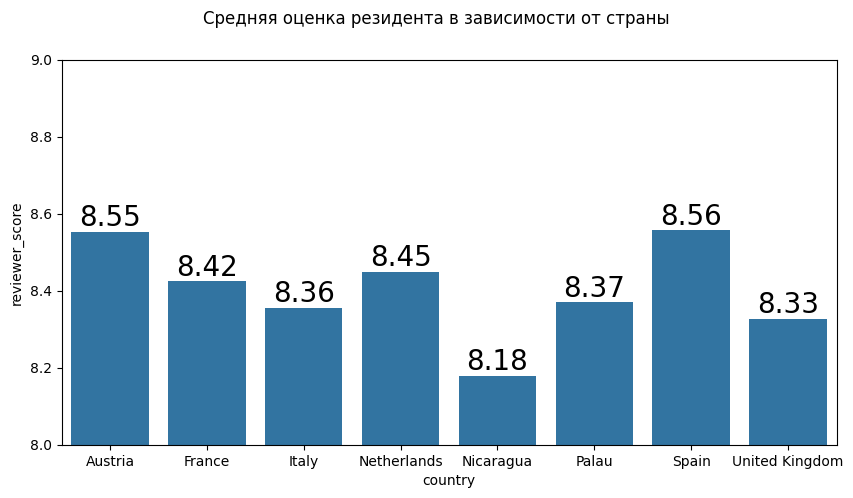

In [231]:
# Посмотрим в целом 
pivot_season = hotels[['country','reviewer_score']].groupby('country').mean()
arr_labels = sorted( hotels['country'].unique() )
fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle('Средняя оценка резидента в зависимости от страны')
season = sns.barplot(
    x=pivot_season.index, 
    y=pivot_season[ 'reviewer_score' ]
)
ax.set_xticklabels(arr_labels)

for p in season.patches:
    season.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', fontsize=20)

plt.ylim(8, 9);

In [187]:
# Проверим
hotels["country"].value_counts()

country
United Kingdom    196773
Spain              44643
France             44528
Netherlands        43004
Austria            29177
Italy              27882
Nicaragua            292
Palau                197
Name: count, dtype: int64

In [232]:
hotels["reviewer_nationality"] = hotels["reviewer_nationality"].apply( lambda x: x.strip() )
hotels['is_resident'] = hotels.apply(lambda row: 1 if row['reviewer_nationality'] == row['country'] else 0, axis=1)

print(hotels['is_resident'].nunique()) # для проверки, количество полученных уникальных значений признака

2


- Вытягиваем города из признака и заносим в новый признак $town$
- Выкусываем города из строки признака hotel_address

In [233]:
# Возвращает список городов из сайта
def get_towns():
    from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

    url = 'https://worldpopulationreview.com/cities/' # Страница стран
    response = requests.get(url)  # Выполняем GET-запрос
    soup = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер

    towns = []

    lines = soup.find_all( 'td' ) # Таблицы городав
    for items in lines[ : ]: 
        #print(items)
        item = items.find( 'a' ) # Затем до ячейки с тэгом <a>
        if item : # После 16 элемента идет не нужная нам информация
            if len(item.text.lower()) > 3:
                towns.append( ' '.join( item.text.split() ) ) # Сразу заключаем в одинарные ковычки город 
            
    return towns

towns = get_towns()

# Новый признак
hotels["town"] = hotels["hotel_address"].apply( lambda x: find_in_arr( x, towns ) )
# Выкусываем город из hotel_address
hotels["hotel_address"] = hotels.apply( lambda x: x["hotel_address"].replace( x["town"], '' ), axis=1 )

# Проверим, что все нормально
print( hotels[hotels["town"] == ""] )
print( hotels["town"].isnull().mean() )

Empty DataFrame
Columns: [hotel_address, additional_number_of_scoring, average_score, hotel_name, reviewer_nationality, negative_review, review_total_negative_word_counts, total_number_of_reviews, positive_review, review_total_positive_word_counts, total_number_of_reviews_reviewer_has_given, reviewer_score, tags, lat, lng, review_date_year, review_date_month, review_date_day, hotel_name_0, hotel_name_1, hotel_name_2, hotel_name_3, hotel_name_4, hotel_name_5, hotel_name_6, hotel_name_7, hotel_name_8, hotel_name_9, hotel_name_10, positive_review_rating, negative_review_rating, staff_pos, very_pos, location_pos, room_pos, hotel_pos, good_pos, great_pos, were_pos, friendly_pos, breakfast_pos, room_neg, negative_neg, not_neg, very_neg, but_neg, hotel_neg, were_neg, had_neg, that_neg, breakfast_neg, country, country_United Kingdom, country_France, country_Netherlands, country_Italy, country_Austria, country_Spain, country_Nicaragua, country_Palau, is_resident, town]
Index: []

[0 rows x 62 c

C:\Users\user\AppData\Local\Temp\ipykernel_17256\347701078.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(arr_labels)


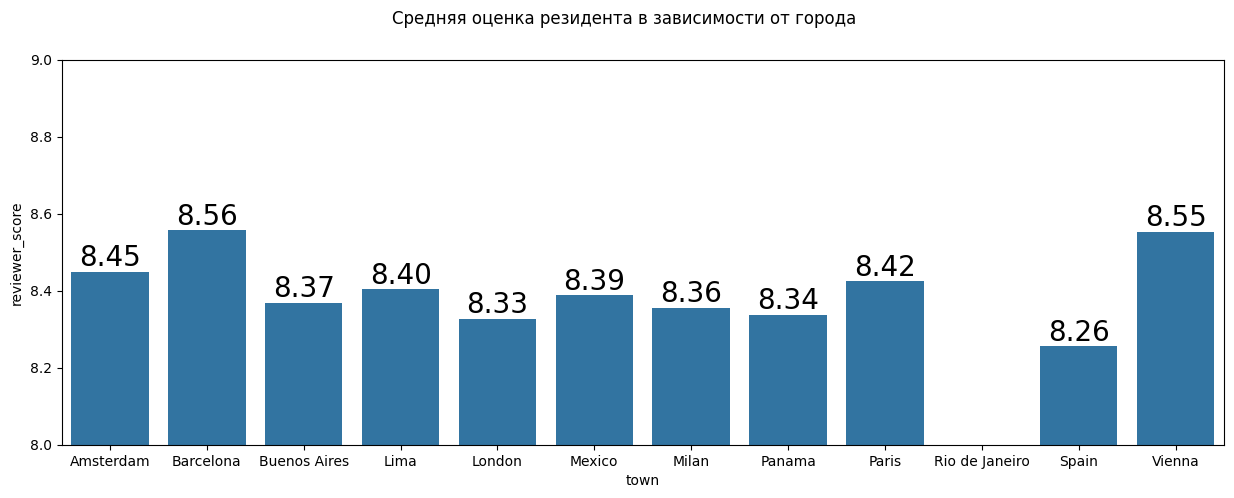

In [235]:
# Посмотрим в целом 
pivot_season = hotels[['town','reviewer_score']].groupby('town').mean()
arr_labels = sorted( hotels['town'].unique() )
fig, ax = plt.subplots(figsize=(15, 5))
plt.suptitle('Средняя оценка резидента в зависимости от города')
season = sns.barplot(
    x=pivot_season.index, 
    y=pivot_season[ 'reviewer_score' ]
)
ax.set_xticklabels(arr_labels)

for p in season.patches:
    season.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', fontsize=20)

plt.ylim(8, 9);

In [192]:
# Проверим
hotels["town"].value_counts()

town
London            196773
Barcelona          44643
Paris              44479
Amsterdam          42725
Vienna             29177
Milan              26768
Buenos Aires         630
Spain                489
Lima                 448
Panama               279
Mexico                49
Rio de Janeiro        36
Name: count, dtype: int64

### Новый признак town - категориальный номинальный, городов мало => OneHotEncoder

In [236]:
cols = ['town']

# Кодируем бинарено
bin_encoder = ce.OneHotEncoder(cols=cols, use_cat_names=True) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels[cols])
hotels = pd.concat([hotels, type_bin], axis=1)

In [237]:
hotels.drop(['town',"hotel_address",'country'],axis=1,inplace=True)

### reviewer_nationality - категориальный номинальный признак, стран мало => OneHotEncoder

In [238]:
cols = ['reviewer_nationality']

bin_encoder = ce.OneHotEncoder(cols=cols, use_cat_names=True) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels[cols])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.drop('reviewer_nationality',axis=1,inplace=True)

### tags - берем из топ 50 оттелей тор 3 самых часто используемых тэгов


In [239]:
tmp_df = hotels[["hotel_name","tags"]].copy()
tmp_df["tags"] = tmp_df["tags"] + ', '

lst_hotels_top = tmp_df.groupby( "hotel_name" )["tags"].count().to_frame().nlargest(50,'tags').index.to_list()
tmp_df = tmp_df[ tmp_df["hotel_name"].isin( lst_hotels_top ) ].groupby( "hotel_name" )["tags"].sum()

list_tags_top = []
for grp, tags in tmp_df.items():

    tags = list( tags.replace( '] [', '],[' ).replace( '[', '' ).replace( ']', '' ).replace( "'", '' ).split(',') )
    tags = list( map( lambda x: x.strip() , tags ))
    tags_set = set( tags )
    tmp_tags = list( map( lambda x: (x, tags.count(x)), tags_set ))
    tmp_tags = list( map( lambda x: x[0], sorted( tmp_tags, key = lambda x: x[1], reverse=True )[:3] ))
    list_tags_top += tmp_tags

list_tags_top = list( set( list_tags_top ) )

for tag in list_tags_top:
    hotels[tag] = hotels["tags"].apply( lambda x: 1 if tag in x else 0 )     
    
print( f"Добавлены признаки тэгов: {len(list_tags_top)} полей, {list_tags_top}" )
hotels.drop( "hotel_name", axis=1, inplace=True )   

Добавлены признаки тэгов: 15 полей, ['Large Double Room', 'Deluxe Double', 'Double Hilton Guestroom', 'Double Room', 'Deluxe King or Twin Room', 'Submitted from a mobile device', 'Couple', 'Deluxe Double Room', 'Club Double Room', 'Leisure trip', 'Superior Double Room', 'Double Guest Room', 'Standard Double Room', 'Stayed 1 night', 'Standard Double or Twin Room']


In [240]:
# Сдвигаем равномерно в положительные значения
min_lng = hotels["lng"].min()
hotels["lng"] = hotels["lng"] - min_lng

# Анализ мультиколлинеарности

In [241]:
methods = ['pearson','spearman']
arr_corr_max = set()

for method in methods:
    arr_corr = hotels.corr( method = method, numeric_only=True ).round(1)
    arr_cols = arr_corr.columns.to_list()
    arr_cols.remove( 'reviewer_score' )
    
    print()
    print( method )
    print( "---------------" )

    #print( type(arr_cols) )
    for ind, col in enumerate( arr_cols ):
        for ind1, col1 in enumerate( arr_cols[ind + 1:] ):
            tmp = arr_corr.iloc[ind][col1]
            if abs(tmp) > 0.7:
                print( col, col1, tmp )
                
            if abs(tmp) > 0.99:
                arr_corr_max.add( col1 )



pearson
---------------
additional_number_of_scoring total_number_of_reviews 0.8
lng country_Spain -0.8
lng town_Barcelona -0.8
review_date_year country_Austria 0.8
review_date_year town_Vienna 0.8
country_France town_London 1.0
country_Netherlands town_Paris 1.0
country_Italy town_Amsterdam 1.0
country_Austria town_Milan 1.0
country_Spain town_Vienna 1.0
country_Nicaragua town_Barcelona 1.0
country_Palau town_Spain 0.8
Double Hilton Guestroom Deluxe Double Room 0.9

spearman
---------------
additional_number_of_scoring total_number_of_reviews 0.9
review_total_negative_word_counts negative_review_rating 0.9
review_total_positive_word_counts positive_review_rating 0.8
review_date_year country_United Kingdom -0.9
review_date_year town_London -0.9
country_France town_London 1.0
country_Netherlands town_Paris 1.0
country_Italy town_Amsterdam 1.0
country_Austria town_Milan 1.0
country_Spain town_Vienna 1.0
country_Nicaragua town_Barcelona 1.0
country_Palau town_Spain 0.8
Double Hilton Gues

### Удаляем абсолютно связанные признаки (если есть)

In [242]:
if len(arr_corr_max) > 0:
    print( f"Удаляем абсолютно связанные признаки: {arr_corr_max}" )
    hotels.drop( arr_corr_max, axis=1, inplace=True )
else:
    print( f"Нет абсолютно связанных признаков" )


Удаляем абсолютно связанные признаки: {'town_Amsterdam', 'town_Vienna', 'town_London', 'town_Milan', 'town_Barcelona', 'town_Paris'}


### Для многократного экспериментирования работаем с копией

In [243]:
tmp_df_all = hotels.copy()

In [244]:
# Удалим нечисловые поля
object_columns = [s for s in tmp_df_all.columns if tmp_df_all[s].dtypes == 'object']
tmp_df_all.drop(object_columns, axis = 1, inplace=True)

### Удаляем неинформативные признаки (если есть)

In [245]:
#список неинформативных признаков
low_information_cols = [] 

all_columns = tmp_df_all.columns.to_list()
all_columns.remove( 'reviewer_score' )

#цикл по всем столбцам
for col in all_columns:
    #наибольшая относительная частота в признаке
    top_freq = tmp_df_all[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = tmp_df_all[col].nunique() / tmp_df_all[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
tmp_df_all.drop(low_information_cols, axis=1, inplace=True)
print()
print(f'Удалены признаки: {low_information_cols}')

country_Nicaragua: 99.92% одинаковых значений
country_Palau: 99.95% одинаковых значений
town_Panama: 99.93% одинаковых значений
town_Buenos Aires: 99.84% одинаковых значений
town_Lima: 99.88% одинаковых значений
town_Spain: 99.87% одинаковых значений
town_Rio de Janeiro: 99.99% одинаковых значений
town_Mexico: 99.99% одинаковых значений
reviewer_nationality_China: 99.34% одинаковых значений
reviewer_nationality_Poland: 99.46% одинаковых значений
reviewer_nationality_France: 98.57% одинаковых значений
reviewer_nationality_Switzerland: 98.32% одинаковых значений
reviewer_nationality_Bulgaria: 99.74% одинаковых значений
reviewer_nationality_Lebanon: 99.56% одинаковых значений
reviewer_nationality_United Arab Emirates: 98.03% одинаковых значений
reviewer_nationality_South Africa: 99.25% одинаковых значений
reviewer_nationality_Nigeria: 99.81% одинаковых значений
reviewer_nationality_Sweden: 99.34% одинаковых значений
reviewer_nationality_Hong Kong: 99.42% одинаковых значений
reviewer_natio

### Готовим данные для обучения

In [246]:
# Числовые признаки. Включим все признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'lat','lng','additional_number_of_scoring',
    'total_number_of_reviews_reviewer_has_given', 'review_total_positive_word_counts'
]

# Пойдем нестандартно. Пусть все поля считаем числовыми
num_cols = tmp_df_all.columns.to_list()
num_cols.remove('reviewer_score')

# категориальные признаки
cat_cols = ['average_score', 'lat', 'lng', 'additional_number_of_scoring']

# Целевой признак
rez_cols = ['reviewer_score']

all_cols = list( set( num_cols ).union( set( cat_cols )).union( set( rez_cols ) ))

tmp_df = tmp_df_all.copy()

### Разбиваем датафрейм на части, необходимые для обучения и тестирования модели 

In [247]:
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = tmp_df.drop(['reviewer_score'], axis = 1)  
y = tmp_df['reviewer_score'] 

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lat                                146.404437
average_score                     1875.411565
lng                               4929.202535
additional_number_of_scoring    848736.321059
dtype: float64

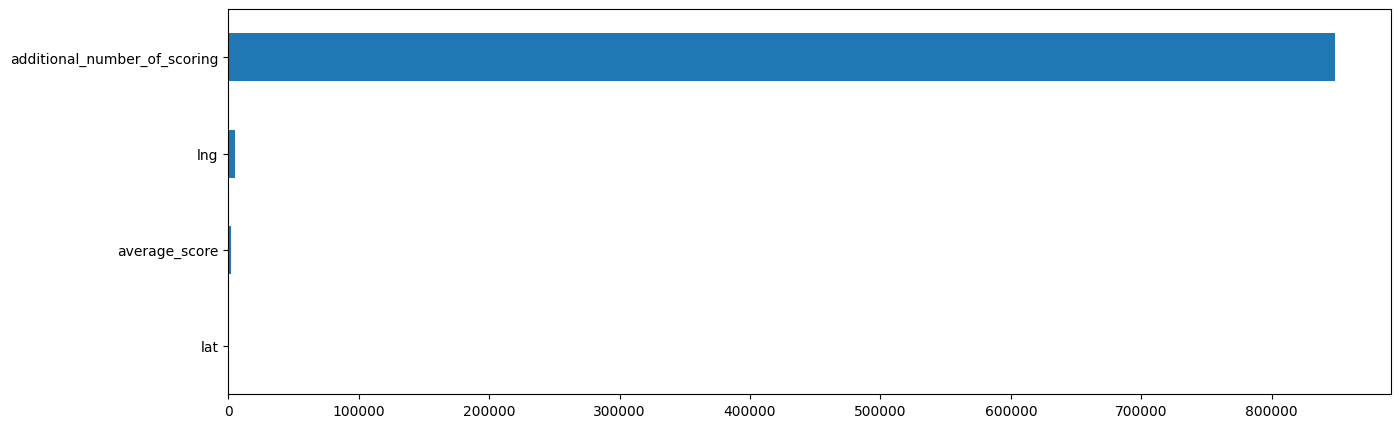

In [248]:
# Категориальные признаки
y1=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y1)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
fig, axes = plt.subplots(1, 1, figsize=(15, 5 ))  # График динамически настраивается в высоту
imp_cat.plot(kind = 'barh')
imp_cat

Удалены избыточные признаки, слабо влияющие на целевой показатель ['review_date_day', 'hotel_name_9', 'hotel_name_4', 'hotel_name_8', 'hotel_name_5', 'hotel_name_3', 'Deluxe Double Room', 'Double Room', 'country_France', 'hotel_name_6', 'hotel_name_0', 'country_Italy', 'hotel_name_10', 'hotel_name_2', 'country_Netherlands', 'Superior Double Room', 'Deluxe Double', 'review_date_year', 'hotel_name_1', 'review_date_month', 'country_Austria', 'hotel_name_7', 'country_Spain', 'Stayed 1 night', 'lat']


<Axes: >

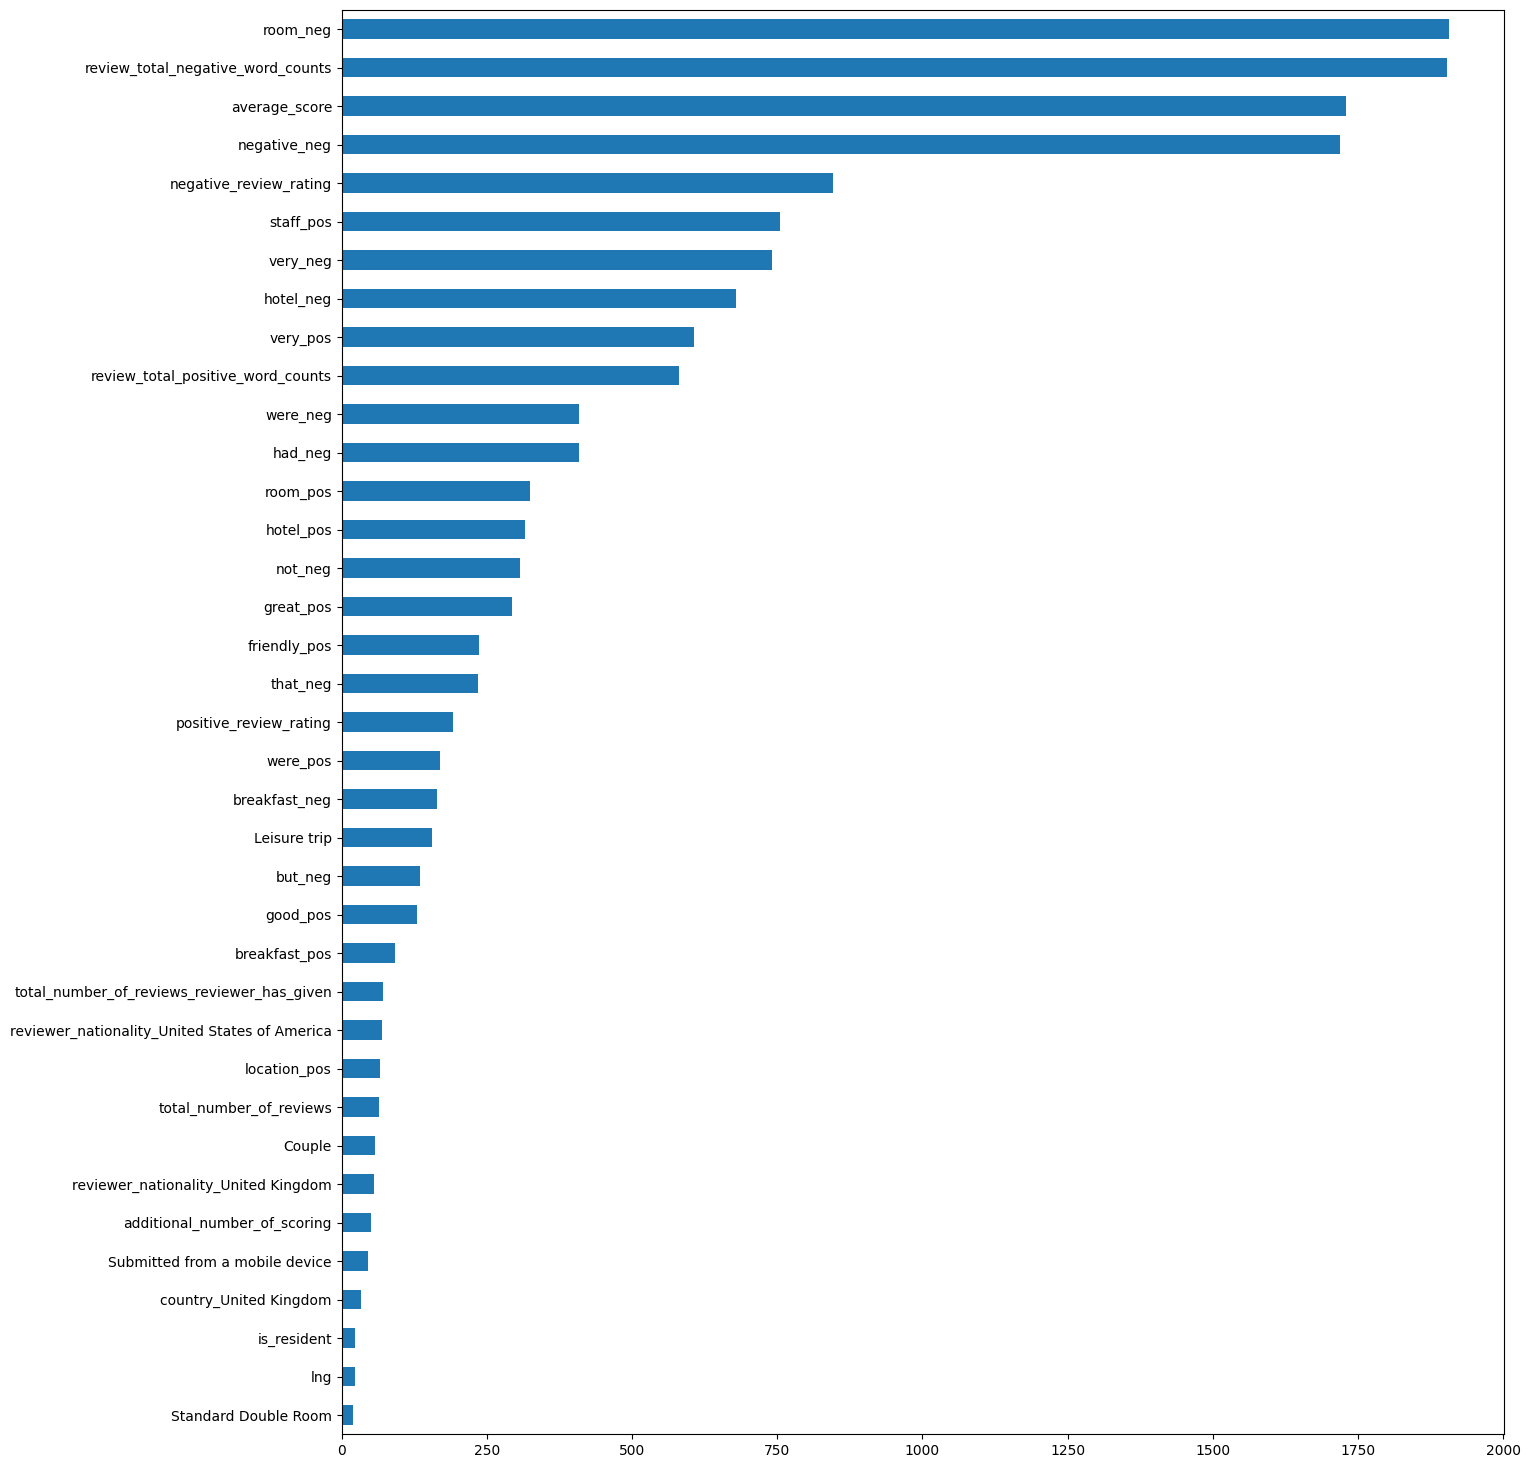

In [249]:
# Числовые признаки

# Предварительная оценка
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)

# Удалим признаки, которые влия.т меньше, чем на % от максимального значения
imp_num_max = imp_num.max()
del_cols = imp_num[ imp_num < imp_num_max * 0.01].index.to_list()

# Удаляем избытояные для обучения признаки
X_train.drop( del_cols, axis=1, inplace=True )
X_test.drop( del_cols, axis=1, inplace=True )
X.drop( del_cols, axis=1, inplace=True )
print( f"Удалены избыточные признаки, слабо влияющие на целевой показатель {del_cols}" )

# Визуализируем
num_cols = list( set( num_cols ) - set( del_cols ) )

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)

fig, axes = plt.subplots(1, 1, figsize=(15, 5 * X_train.shape[1] / 10))
imp_num.plot(kind = 'barh')

# Обучаем модель

In [250]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

################################################
# default: MAPE: 0.14155421973519144

# 7 min

In [251]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.12800593133578694
MAE: 0.8860445343363373


In [252]:
hotels_submit_predict = y_test.to_frame().loc[:,'reviewer_score']

In [253]:
hotels_submit_predict.to_csv('hotels_submit_predict.csv', index = False)